<a href="https://colab.research.google.com/github/gayathrinair20/EDA-Theory-DA-21BDS0071/blob/main/EDA_Theory_21BDS0071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Theory Assignment**
## Name : Gayathri A Nair
## Reg No : 21BDS0071

##**Module 1 - Understanding the Data**


Step 1: Import Necessary Libraries and Load Data

In [3]:
# Gayathri A Nair 21BDS0071

# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/bodyPerformance.csv')
# Display the first few rows of the dataset
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Step 2: Initial Exploration

*To understand the structure, data types, dimensions, and summary statistics:*

In [ ]:
# Check the dataset's dimensions
print("Dimensions of the dataset:", df.shape)

# Get summary statistics of numerical columns
print("\nSummary Statistics:\n", df.describe())

# Check for any missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types of each column
print("\nData Types:\n", df.dtypes)

Dimensions of the dataset: (13393, 12)

Summary Statistics:
                 age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13392.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.257107     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771

Step 3: Univariate Analysis (Initial Data Distribution)

*A basic understanding of each variable's distribution:*

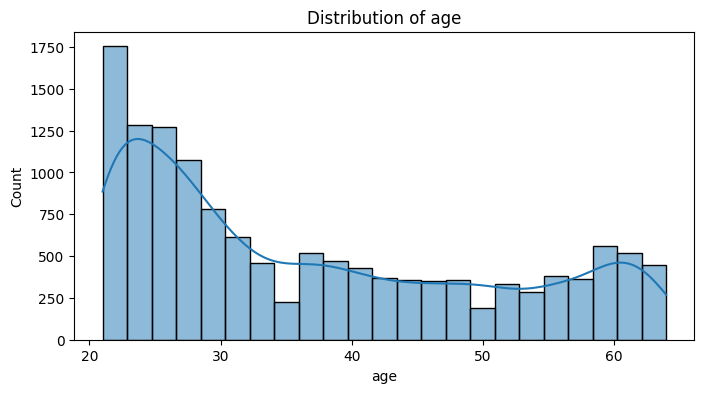

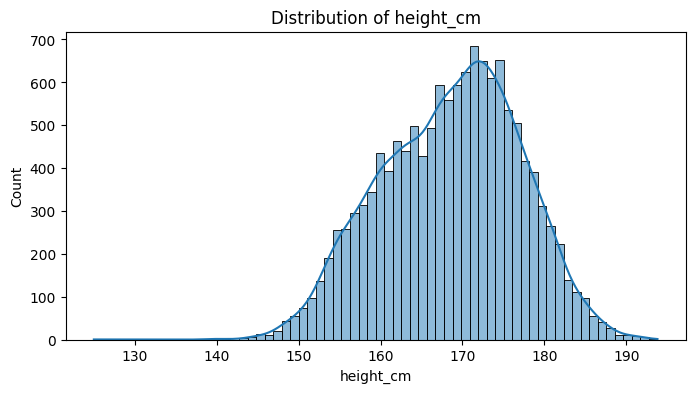

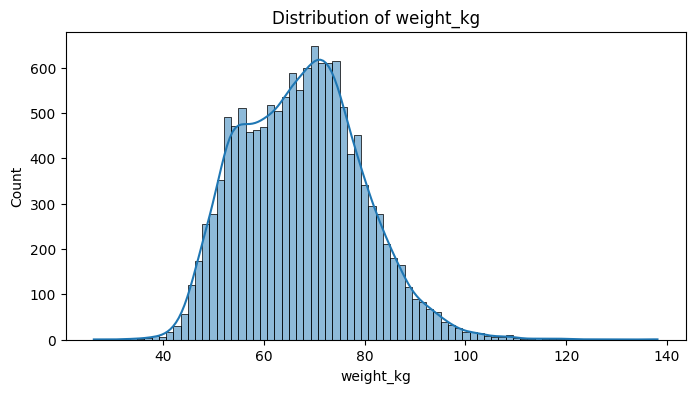

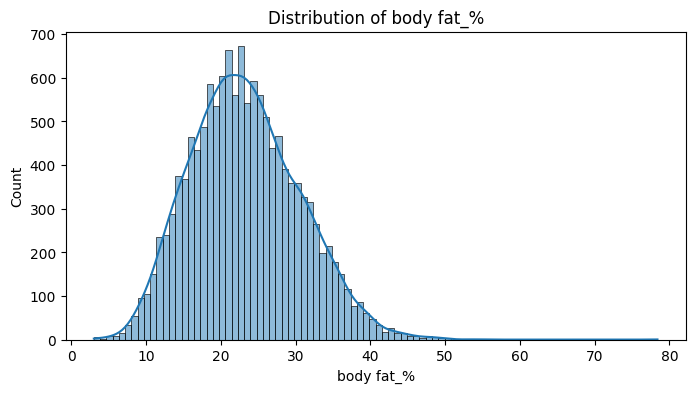

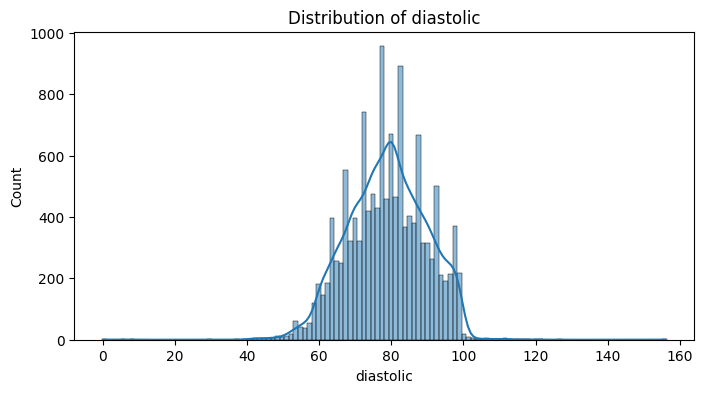

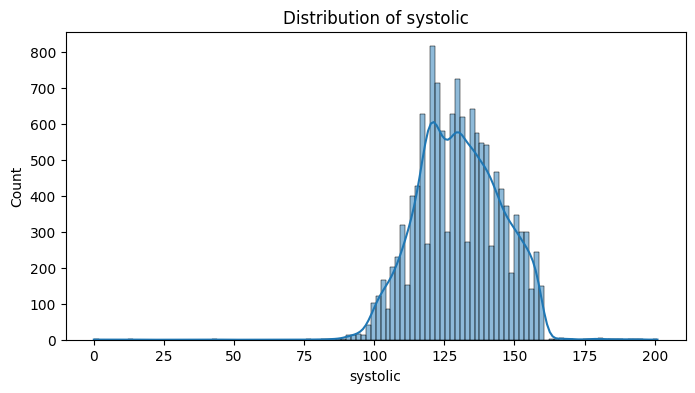

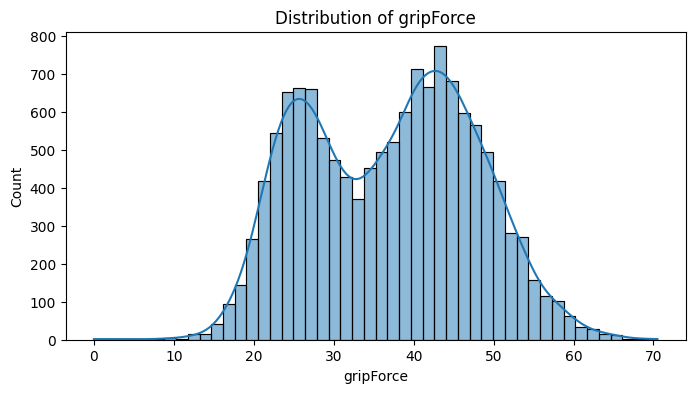

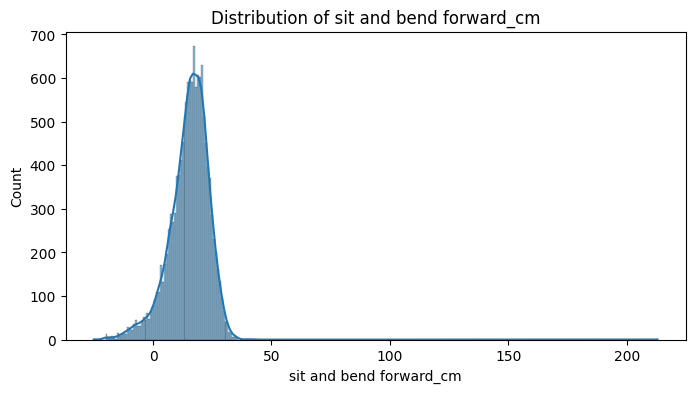

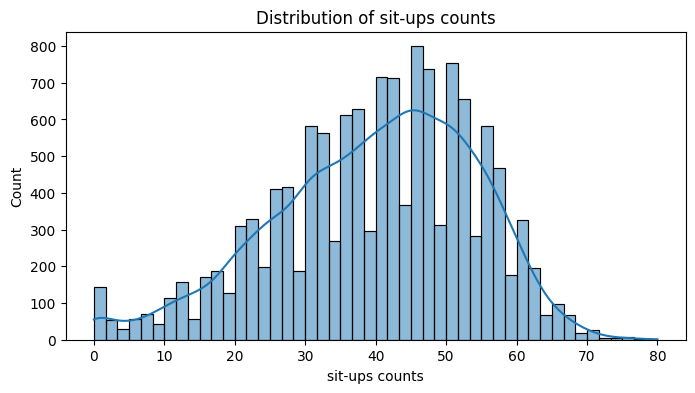

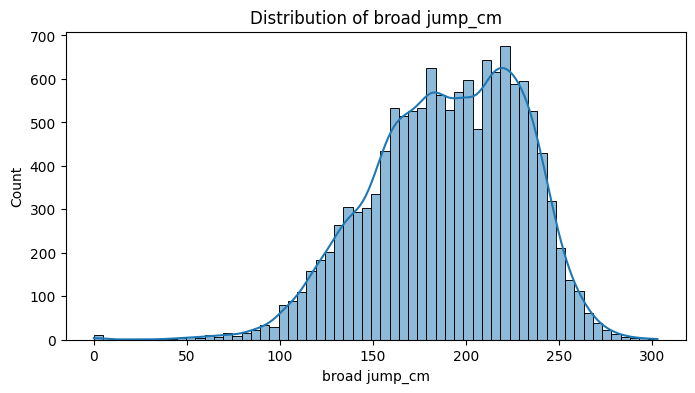

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## **Module 2 - Data Transformation**


Step 1: Data Deduplication

*Removing duplicate rows to ensure only unique records remain.*

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()
print("Data after removing duplicates:", df.shape)

Number of duplicate rows: 1
Data after removing duplicates: (13392, 12)


Step 2: Handling Missing Values

*Inspecting and handling missing data with traditional imputation techniques or by removing rows/columns with too many missing values.*

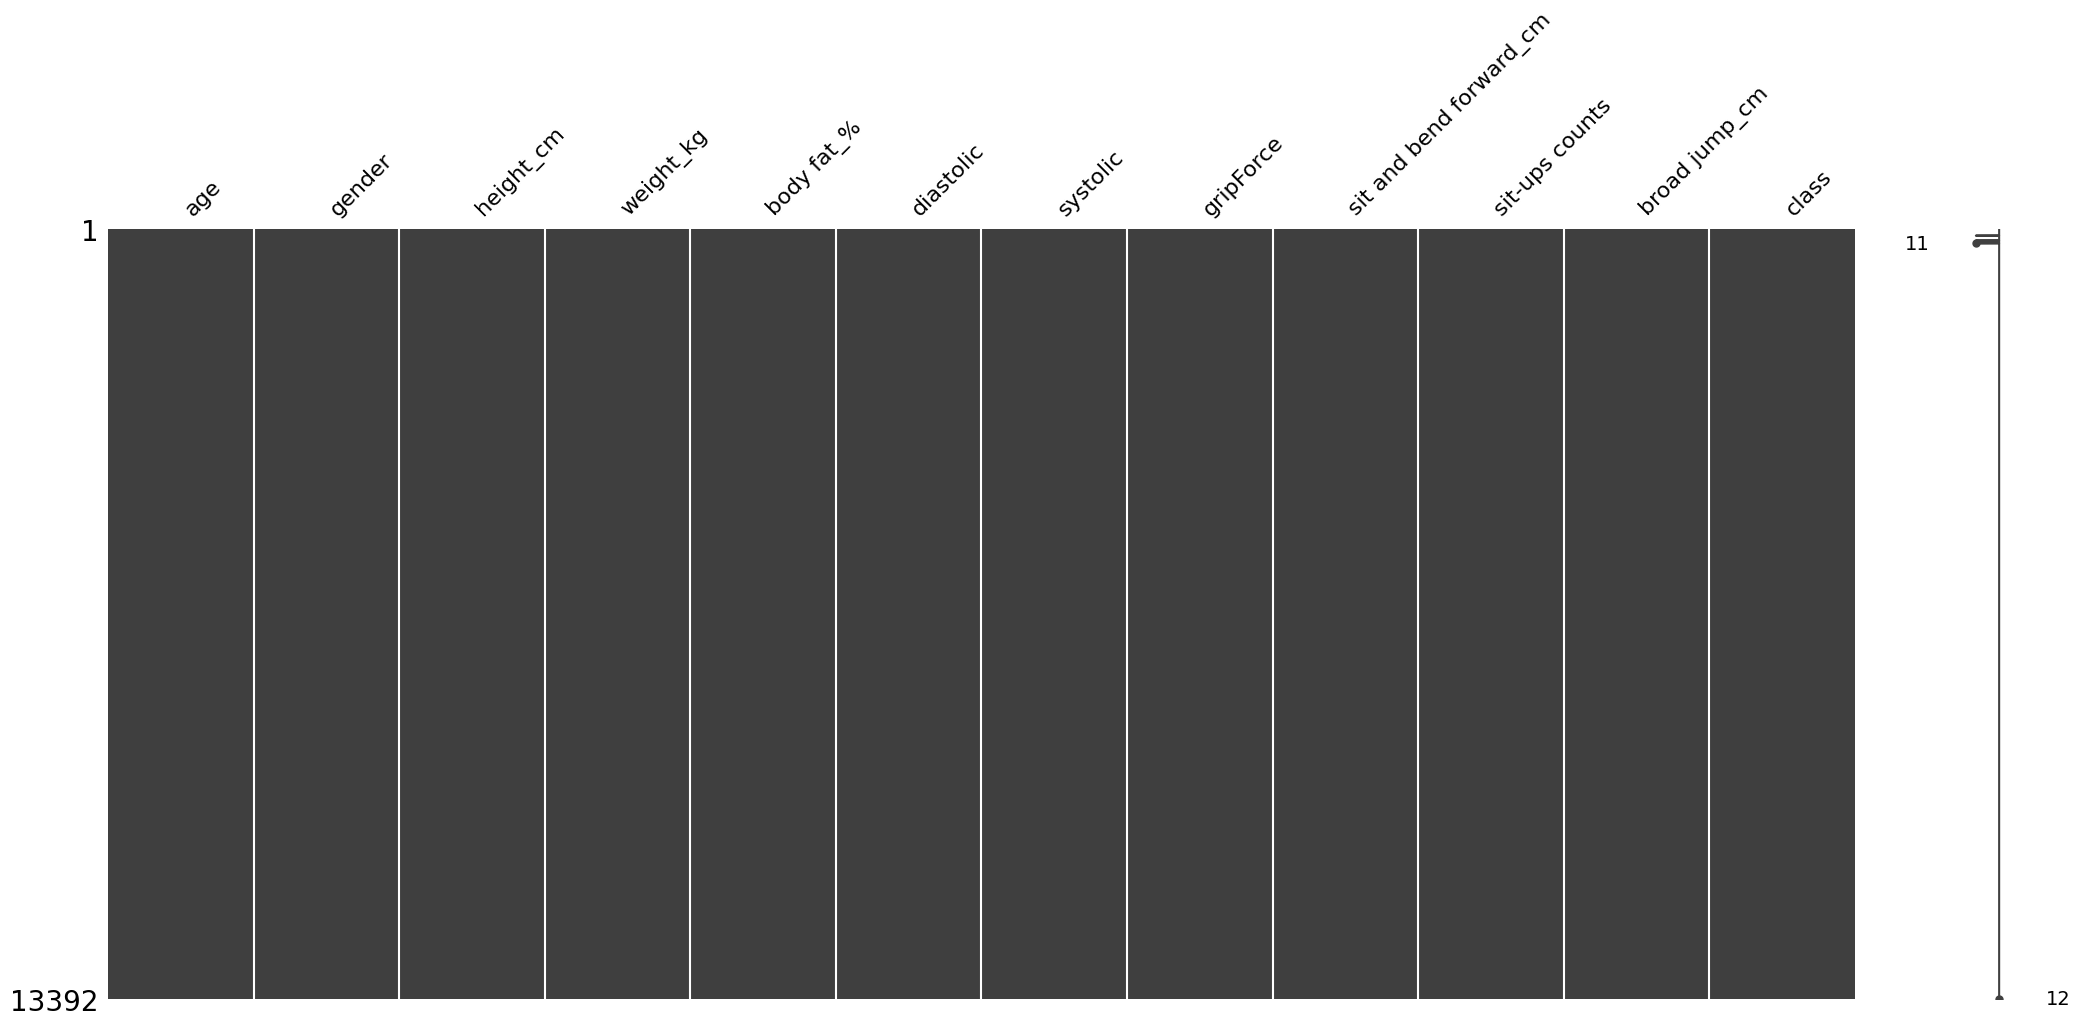

<ipython-input-7-79fc89918b00>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-7-79fc89918b00>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Visualize missing data
import missingno as msno

# Missing values matrix
msno.matrix(df)
plt.show()

# Handle missing values by filling with mean (for numerical data) or mode (for categorical data)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col].fillna(df[col].mean(), inplace=True)
    else:  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)

Step 3: Replacing Values

*Sometimes, specific values (e.g., outliers or placeholder values) need to be replaced for consistency.*

In [ ]:
# Replace any placeholder values (like -1 or 9999) with NaN, then fill them if needed
df.replace([-1, 9999], np.nan, inplace=True)

# Optionally re-run missing value handling if new NaNs were created
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col].fillna(df[col].mean(), inplace=True)
    else:  # Categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-8-7b9b0fb198ee>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-8-7b9b0fb198ee>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Step 4: Discretization and Binning

*Binning continuous data can help in categorizing variables into segments, which is especially useful for reducing complexity or improving interpretability.*

`The dataset includes numerical columns like age, height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, and others. We will proceed with binning the body fat_% column into four categories (Low, Medium, High, Very High) based on the percentage ranges.`





In [ ]:
# Discretize 'body fat_%' into bins
df['body_fat_category'] = pd.cut(df['body fat_%'], bins=4, labels=["Low", "Medium", "High", "Very High"])

# Display the original and newly created binned column
df[['body fat_%', 'body_fat_category']].head()

,body fat_%,body_fat_category
0,21.3,Low
1,15.7,Low
2,20.1,Low
3,18.4,Low
4,17.1,Low


## **Module 3 - Correlation and Time Series Analysis**

Since TSA typically applies to datasets with temporal information, we’ll adapt it if needed.

**For now, let’s start with Univariate, Bivariate, and Multivariate Analysis.**

Step 1: Univariate Analysis

*First, we plot distributions for the numeric columns to understand their spread.*

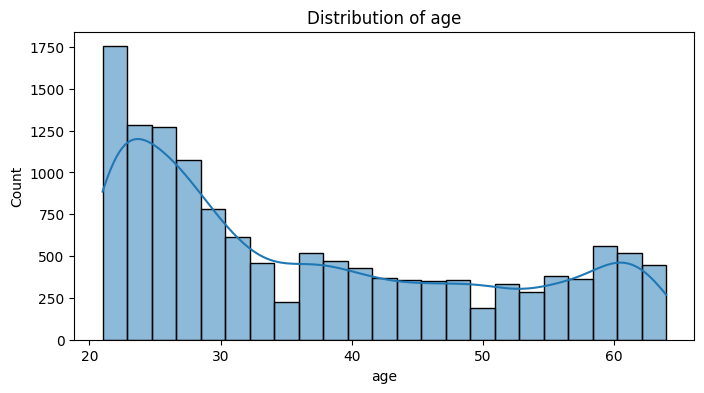

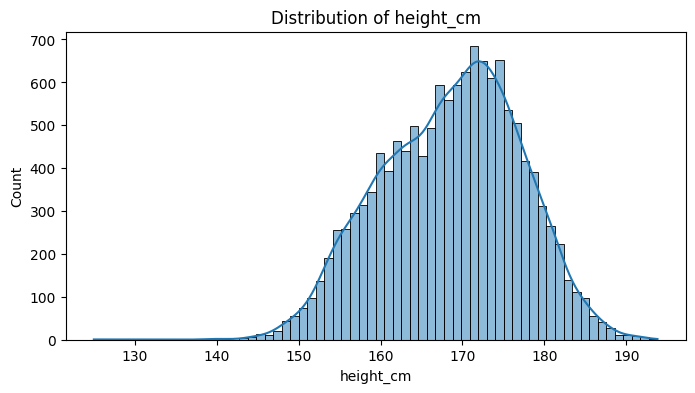

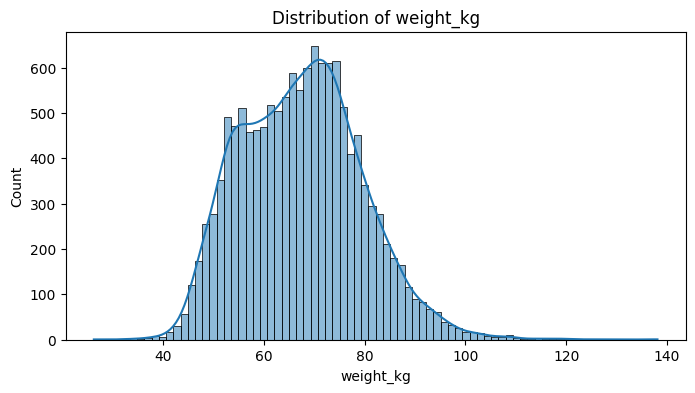

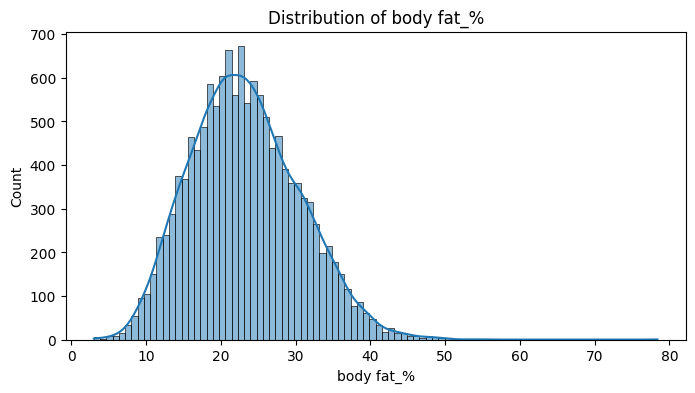

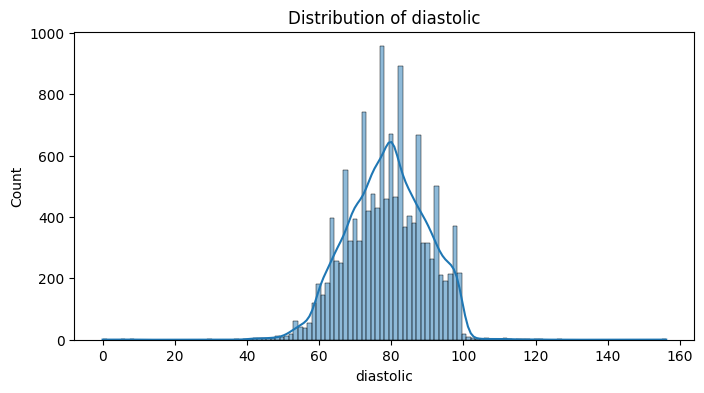

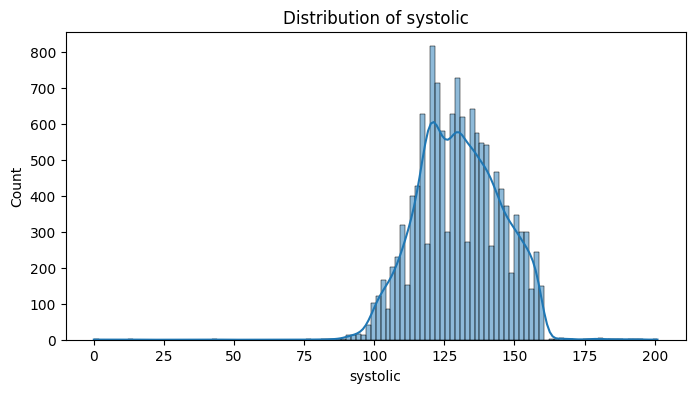

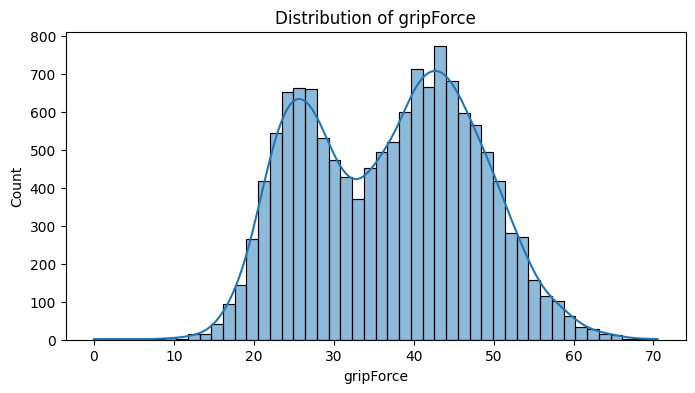

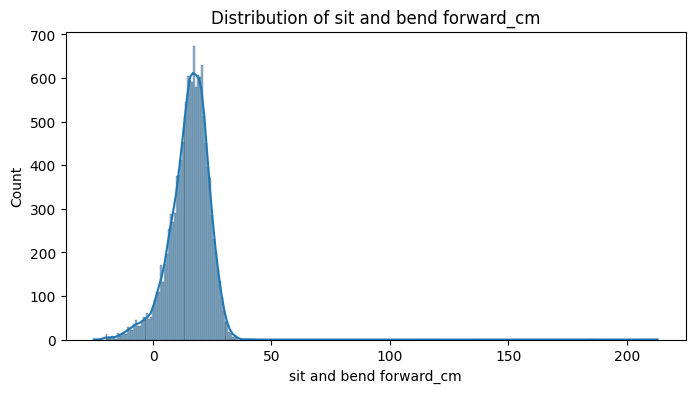

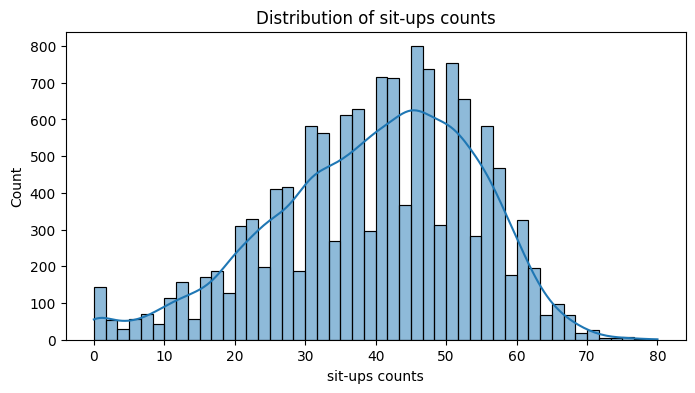

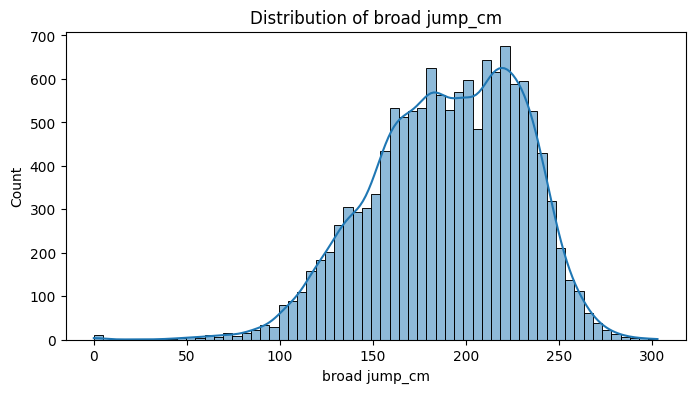

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for all numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Step 2: Bivariate Analysis

*We’ll calculate pairwise correlations among numerical variables and visualize these in a heatmap.*

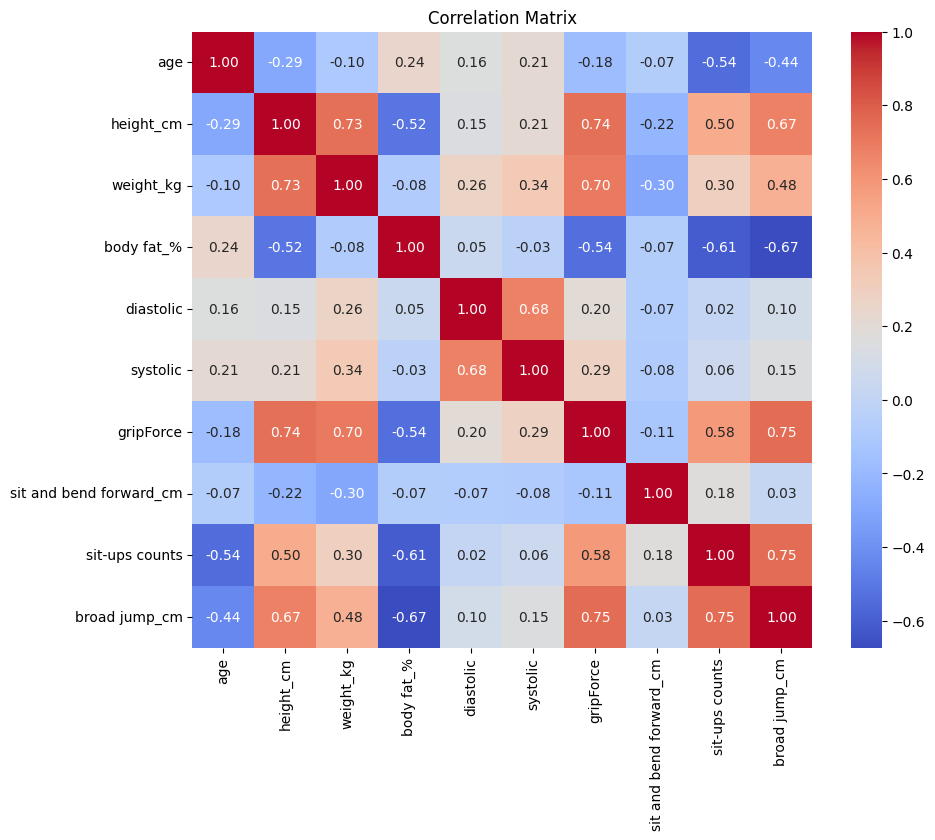

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate and display the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Step 3: Multivariate Analysis

*We’ll use pair plots to examine relationships between multiple features, focusing on a subset to avoid too much clutter.*

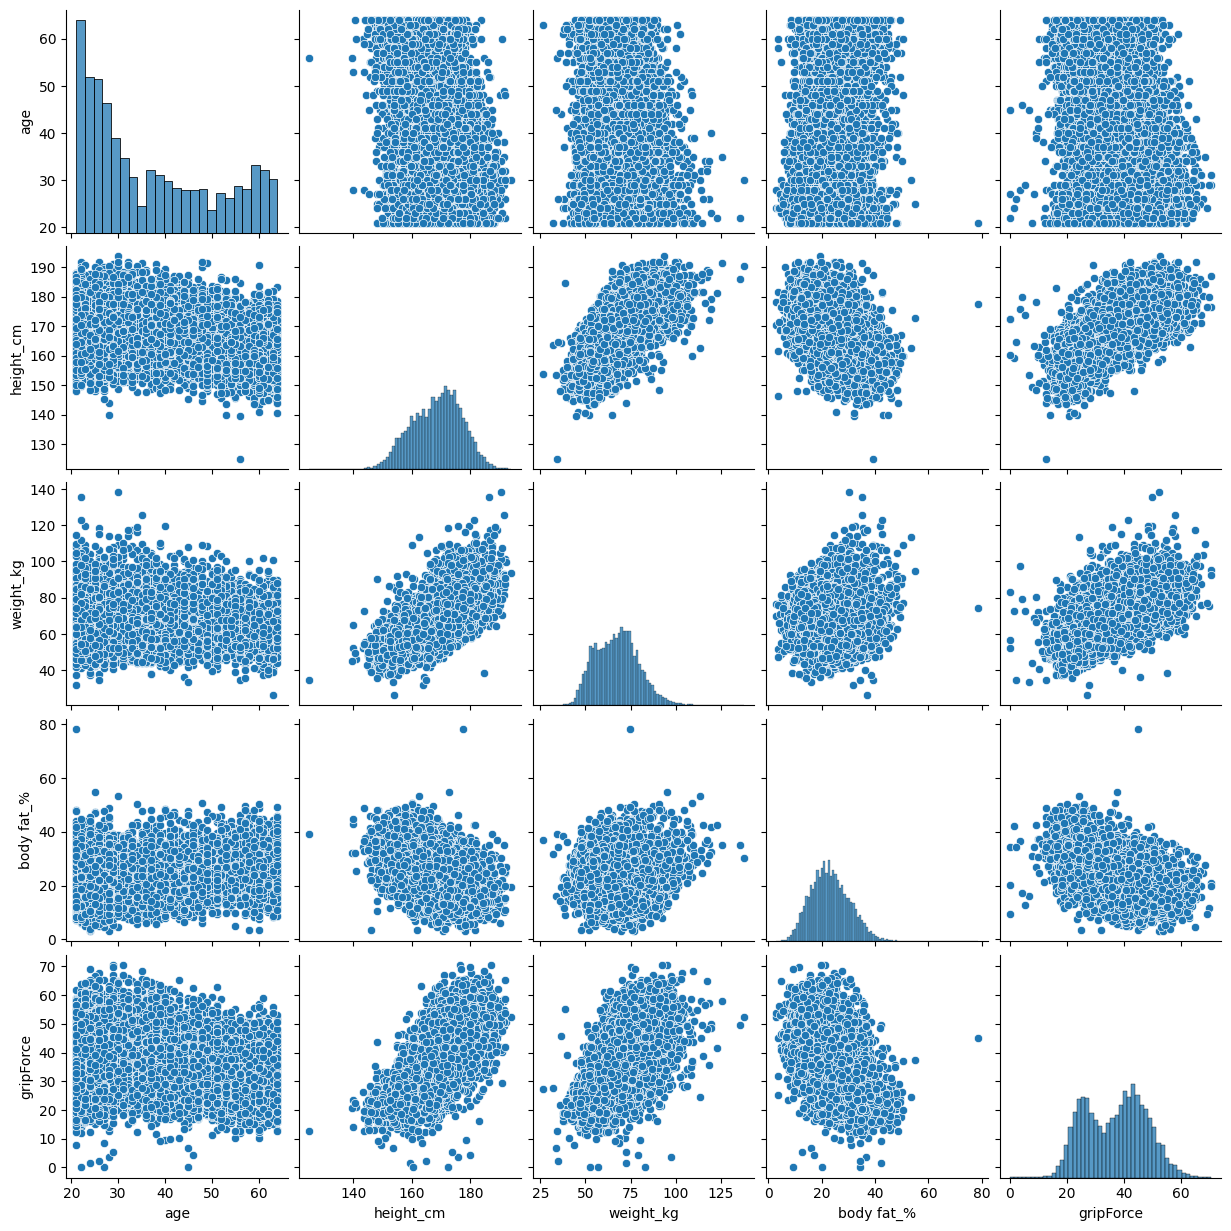

In [ ]:
# Selecting a subset of columns for pair plotting
selected_columns = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'gripForce']
sns.pairplot(df[selected_columns])
plt.show()

## **Module 4: Data Summarization and Visualization**

Step 1: Statistical Summary Measures

*Calculating summary statistics for all numeric columns, including measures like mean, median, variance, and standard deviation.*

In [ ]:
# Summary statistics for all numeric columns
summary_stats = df.describe()
print(summary_stats)

                age     height_cm     weight_kg    body fat_%     diastolic  \
count  13392.000000  13392.000000  13392.000000  13392.000000  13392.000000   
mean      36.775836    168.560671     67.448686     23.239700     78.797499   
std       13.625886      8.426305     11.949061      7.256821     10.742165   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13392.000000             13392.000000    13392.000000   
mean     130.237241     36.964569                15.224683       39.770385   
std       14.709185     10.624959                 8.44

Step 2: 1-D Statistical Data Analysis

*Visualizing individual distributions for each numeric variable to understand their central tendency and spread.*

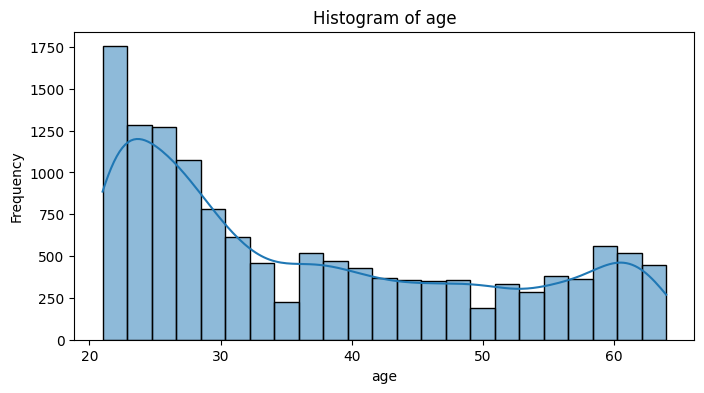

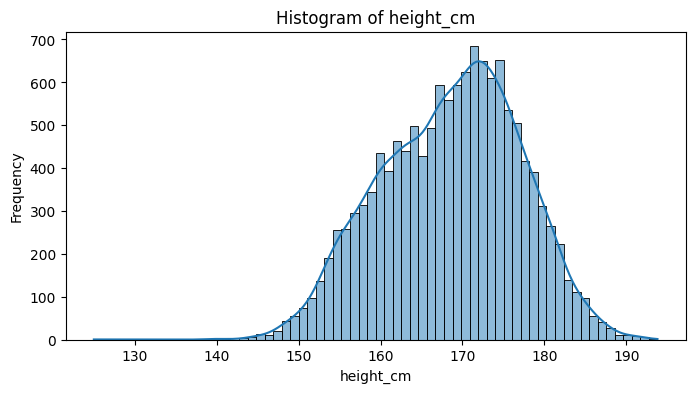

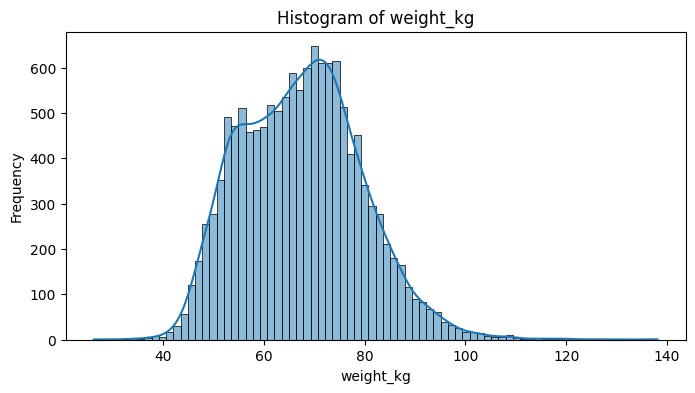

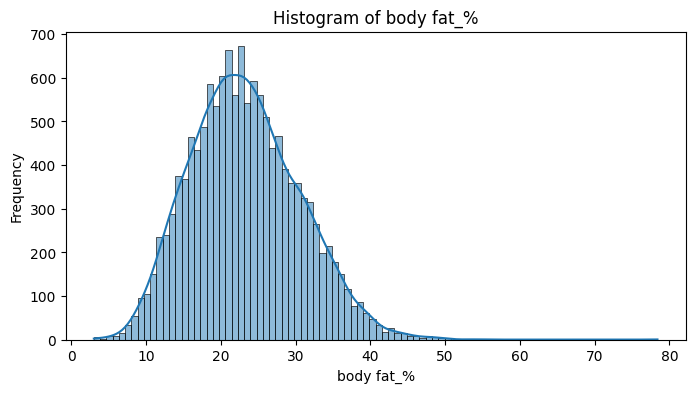

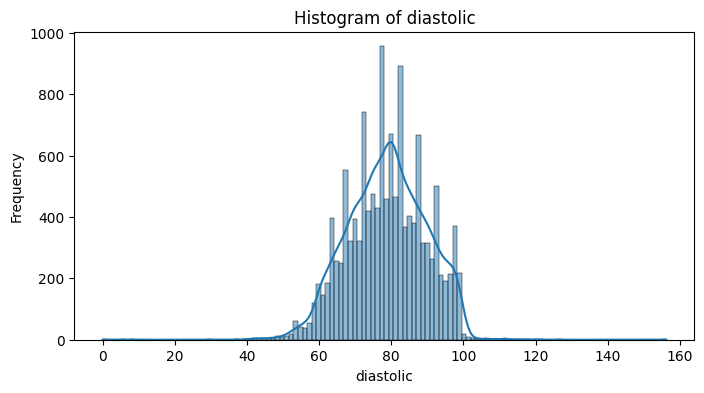

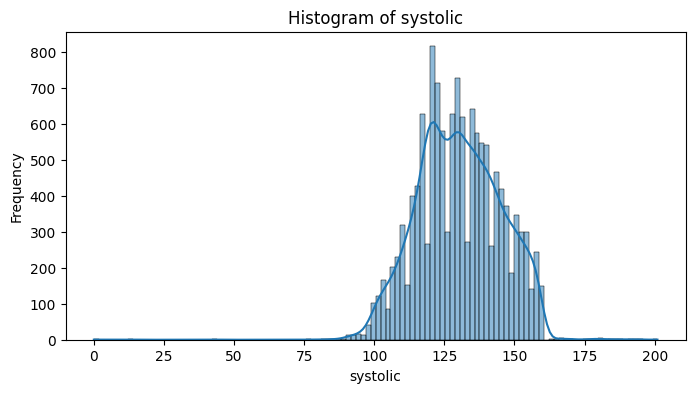

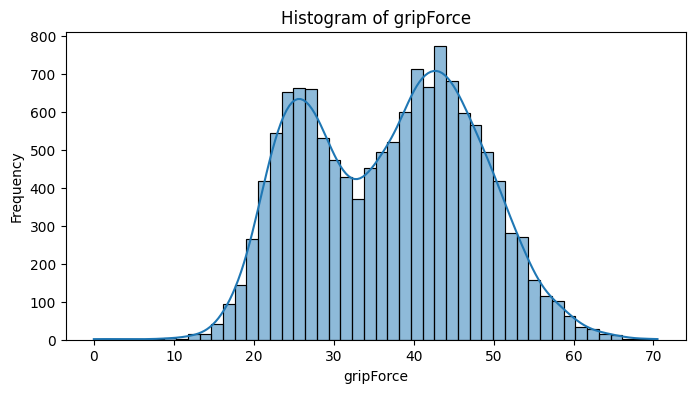

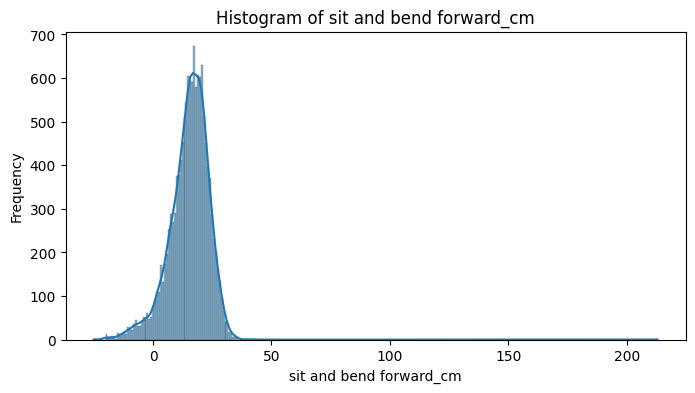

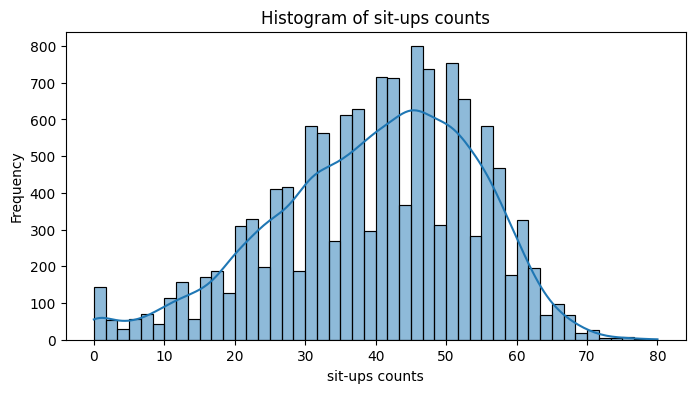

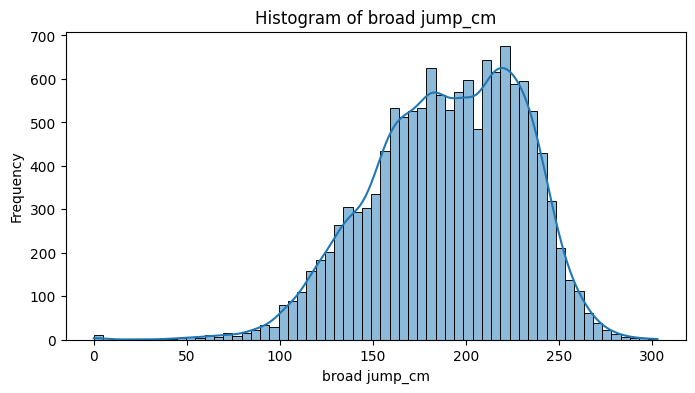

In [ ]:
# Visualizing each numeric column with histograms
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Step 3: 2-D Statistical Data Analysis

*We can analyze relationships between two variables using scatter plots and contingency tables.*

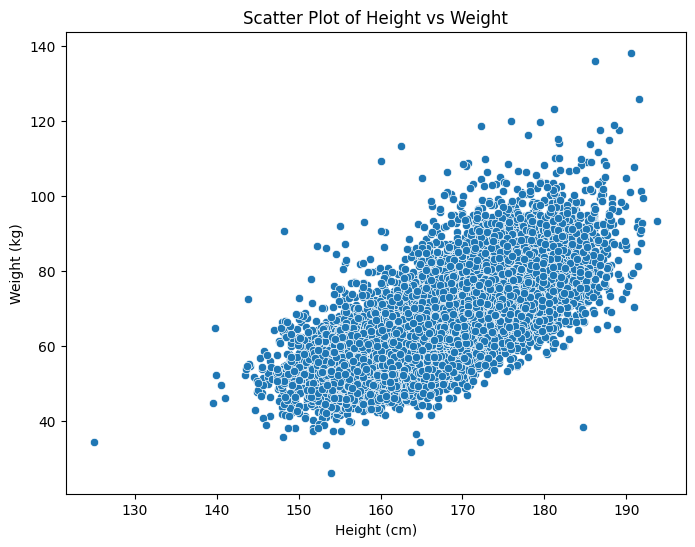

In [ ]:
# Scatter plot for two variables (e.g., 'height_cm' vs 'weight_kg')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='height_cm', y='weight_kg')
plt.title("Scatter Plot of Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

**Contingency Tables**

For categorical variables, we can create contingency tables to see the relationship between categories.

In [ ]:
# Contingency table for two categorical variables
# Example: Gender and Class
if 'gender' in df.columns:
    contingency_table = pd.crosstab(df['gender'], df['class'])
    print(contingency_table)

class   ?     A     B     C     D
gender                           
F       0  1483  1185  1112  1145
M       1  1864  2162  2236  2204


Step 4: Visualizations

**Radar Chart**

*Radar charts work well for visualizing multiple attributes across a category.*

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd

# Calculating mean values for each category
radar_data = df.groupby('gender')[['height_cm', 'weight_kg', 'gripForce']].mean().reset_index()

# Transforming data to long format for the radar chart
radar_data = pd.melt(radar_data, id_vars=['gender'], var_name='Metric', value_name='Value')

# Creating radar chart
fig = px.line_polar(radar_data, r='Value', theta='Metric', color='gender', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title="Radar Chart of Height, Weight, and Grip Force by Gender")
fig.show()

**Bar Plot**

<ipython-input-19-14b90b2b5e6a>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



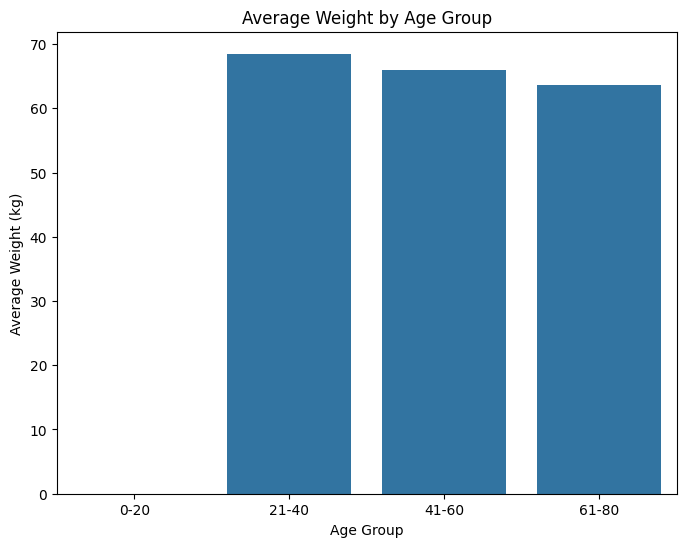

In [ ]:
# Bar plot for average weight per age group
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])
avg_weight = df.groupby('age_group')['weight_kg'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_weight, x='age_group', y='weight_kg')
plt.title("Average Weight by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Weight (kg)")
plt.show()

**Box Plot**

*Box plots show the distribution of data and highlight outliers.*

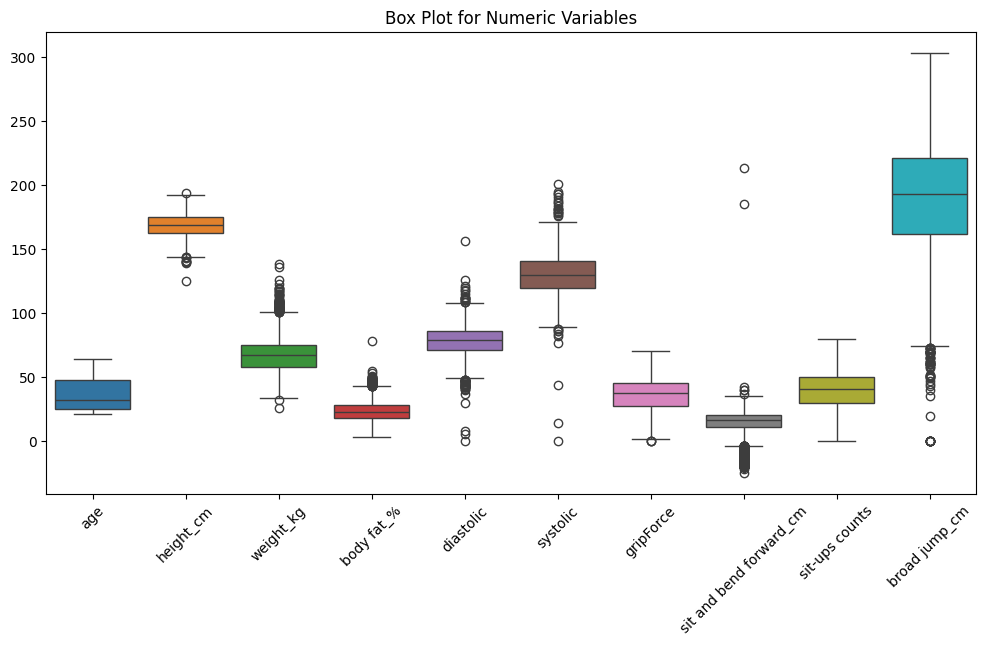

In [ ]:
# Box plot for multiple numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot for Numeric Variables")
plt.xticks(rotation=45)
plt.show()

**Heatmap (Correlation Matrix)**

*A heatmap will show correlations between numerical variables.*

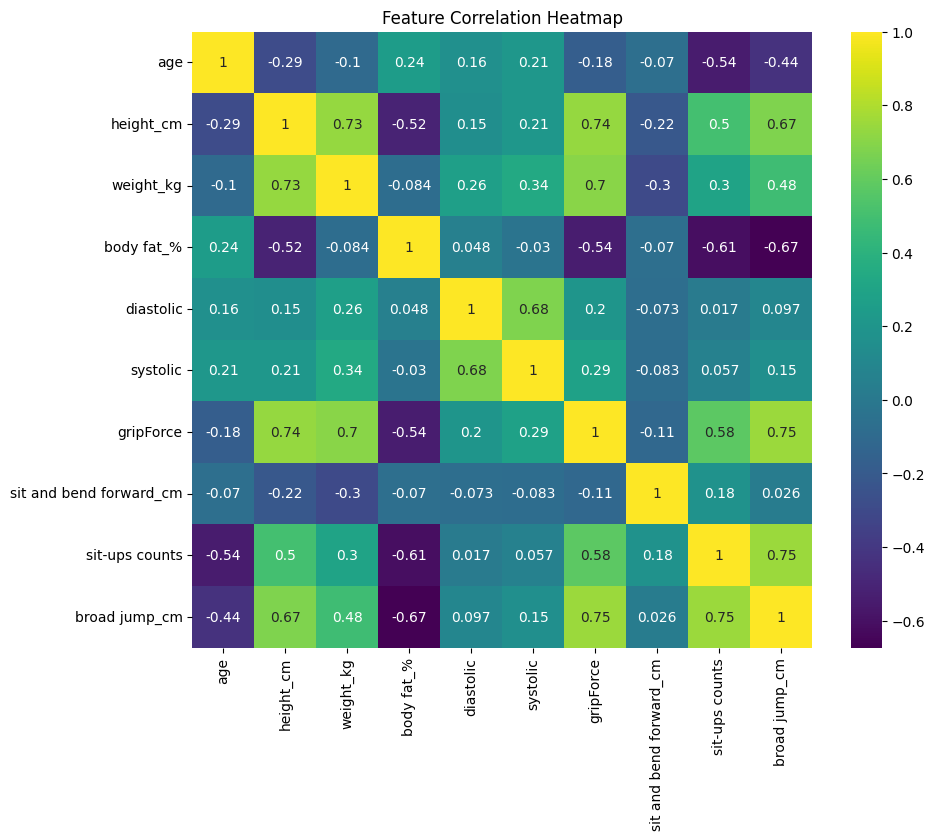

In [ ]:
# Filter for only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Heatmap for correlation matrix on numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.title("Feature Correlation Heatmap")
plt.show()


**Pair Plot**

*Pair plots are useful for examining relationships across all numeric columns, which can provide insights into multivariate relationships in the data.*

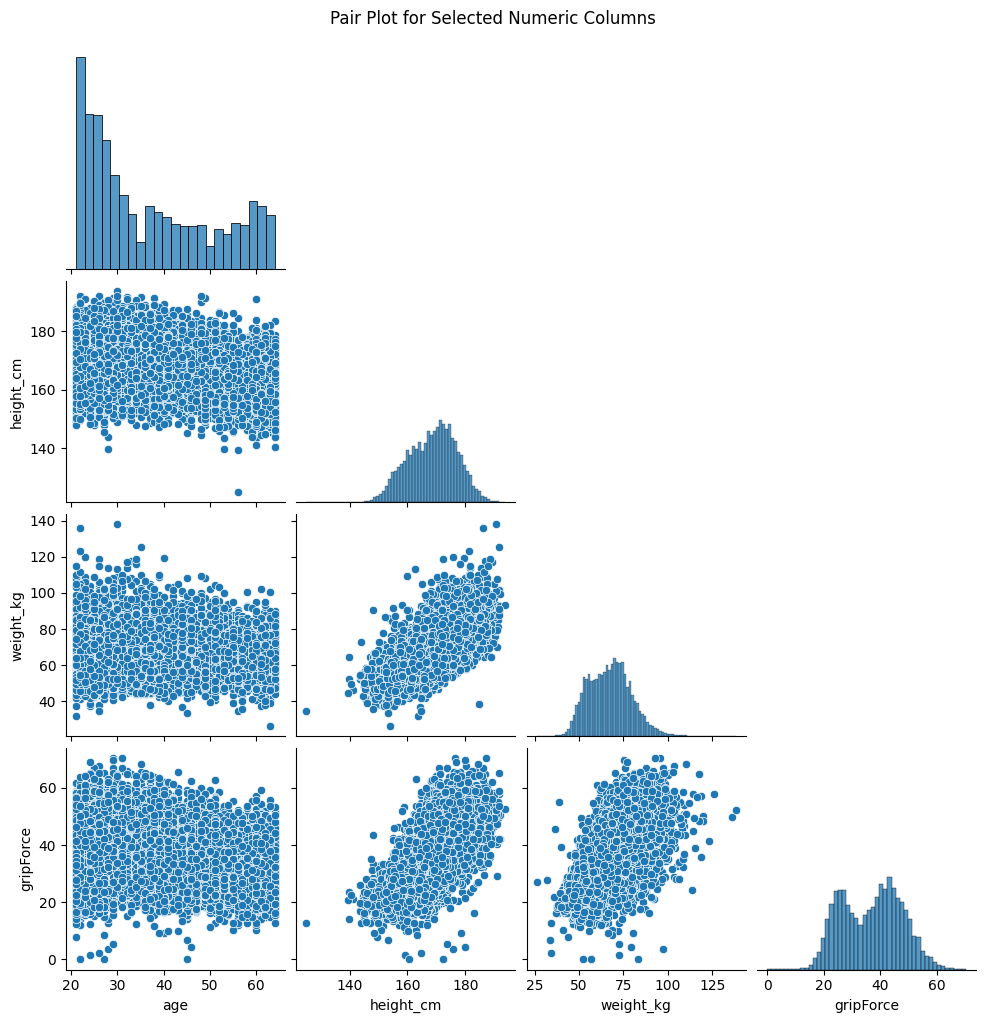

In [ ]:
# Pair plot for a subset of numeric columns
selected_columns = ['age', 'height_cm', 'weight_kg', 'gripForce']
sns.pairplot(df[selected_columns], corner=True)
plt.suptitle("Pair Plot for Selected Numeric Columns", y=1.02)
plt.show()

## **Module 5 : Clustering Algorithms**

Step 1: Data Preparation for Clustering

*Clustering generally requires only numerical data, so we’ll focus on relevant columns in the dataset (like height_cm, weight_kg, gripForce, and age).*

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
clustering_data = df[['height_cm', 'weight_kg', 'gripForce', 'age']]

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

Step 2: Spectral Clustering

*Spectral clustering is effective for complex, non-linear relationships in data.*

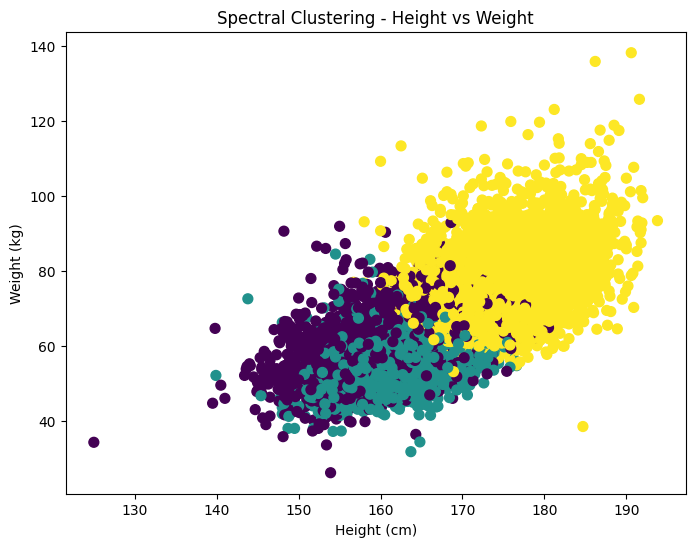

In [ ]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spectral_labels = spectral_clustering.fit_predict(clustering_data_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data['height_cm'], clustering_data['weight_kg'], c=spectral_labels, cmap='viridis', s=50)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Spectral Clustering - Height vs Weight")
plt.show()

Step 3: Hierarchical Agglomerative Clustering

*Hierarchical clustering builds nested clusters by merging or splitting them successively. We’ll use dendrograms to visualize this clustering:*

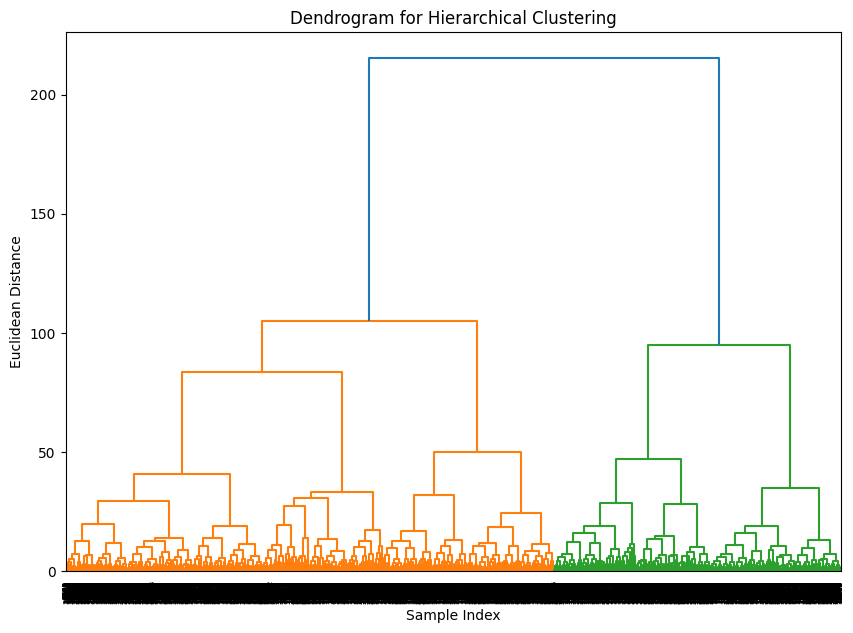

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(clustering_data_scaled, method='ward')

# Dendrogram plot
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()

Step 4: Outlier Detection Using Clustering

*Outliers can often be detected by clustering methods like DBSCAN, where outliers are labeled as noise.*

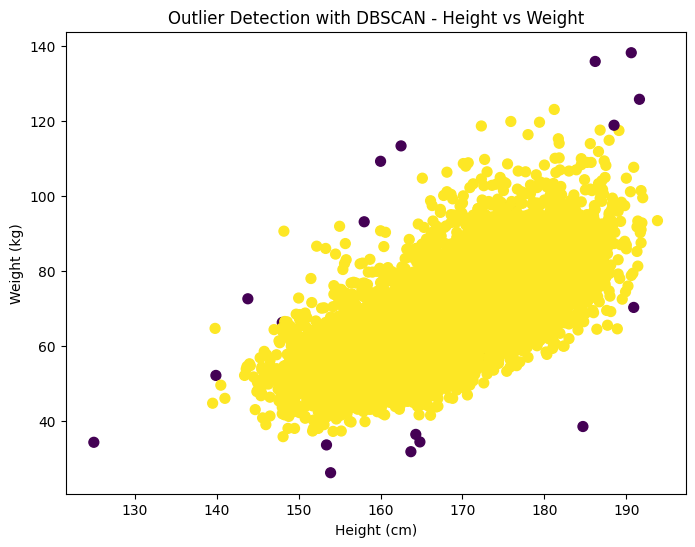

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(clustering_data_scaled)

# Visualize outliers (labeled as -1)
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data['height_cm'], clustering_data['weight_kg'], c=dbscan_labels, cmap='viridis', s=50)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Outlier Detection with DBSCAN - Height vs Weight")
plt.show()

Step 5: K-Means Clustering

*K-Means requires numerical input, so we’ll select only numerical columns. Also, it’s often useful to standardize the data so that all features contribute equally.*

Shape of scaled data: (13393, 8)


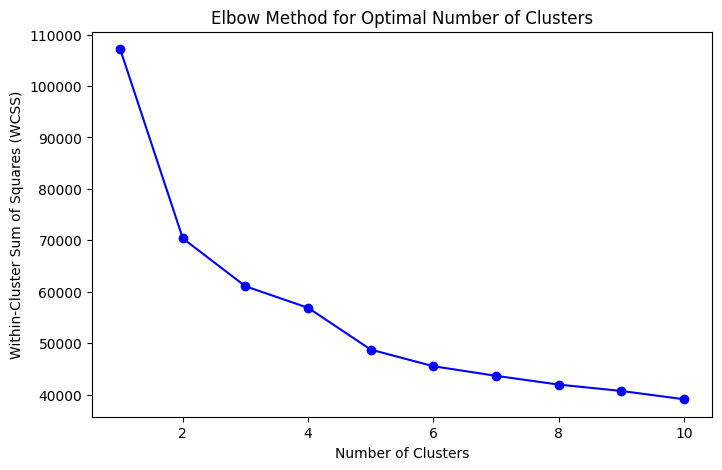

Cluster
2    5534
1    4857
0    3002
Name: count, dtype: int64


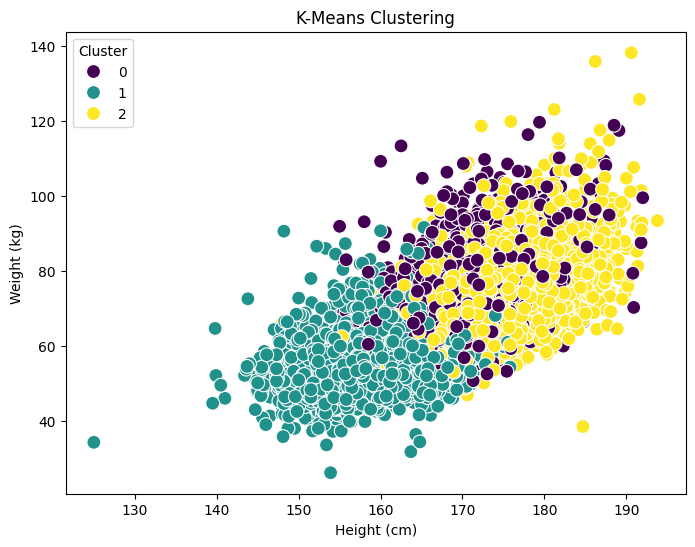

In [4]:
# Step 1: Prepare Data for Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting numerical features for clustering
numerical_features = df.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Checking the scaled data shape
print("Shape of scaled data:", scaled_features.shape)

# Step 2: Determine the Optimal Number of Clusters (Using the Elbow Method)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

# Step 3: Apply K-Means Clustering with the Optimal Number of Clusters

# Applying KMeans with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

# Step 4: Visualize the Clusters

import seaborn as sns

# Scatter plot for two features, coloring by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='height_cm', y='weight_kg', hue='Cluster', palette="viridis", s=100)
plt.title("K-Means Clustering")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend(title="Cluster")
plt.show()

## **Module 6: Dimensionality Reduction**

Step 1: Principal Component Analysis (PCA)

*PCA reduces dimensionality by transforming data to new axes (principal components) that maximize variance.*

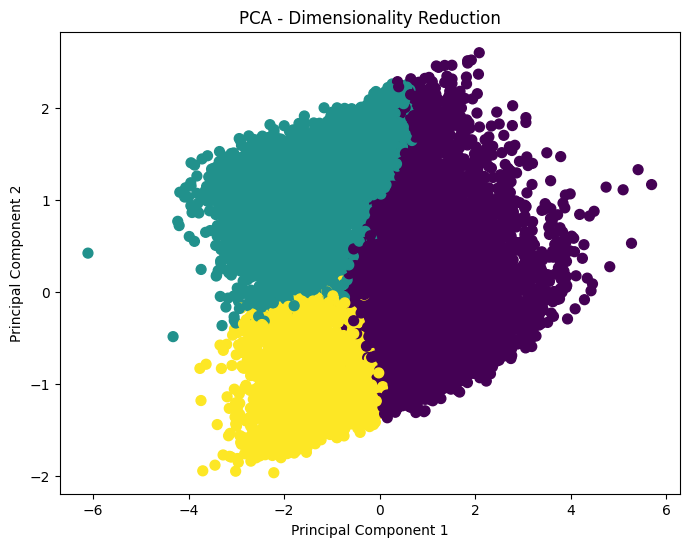

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA to standardized clustering data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=spectral_labels, cmap='viridis', s=50)  # Using Spectral Clustering labels from Module 5
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Dimensionality Reduction")
plt.show()

Step 2: Singular Value Decomposition (SVD)

*SVD is commonly used for text and image data. It can also reduce feature dimensions by decomposing the matrix of features.*

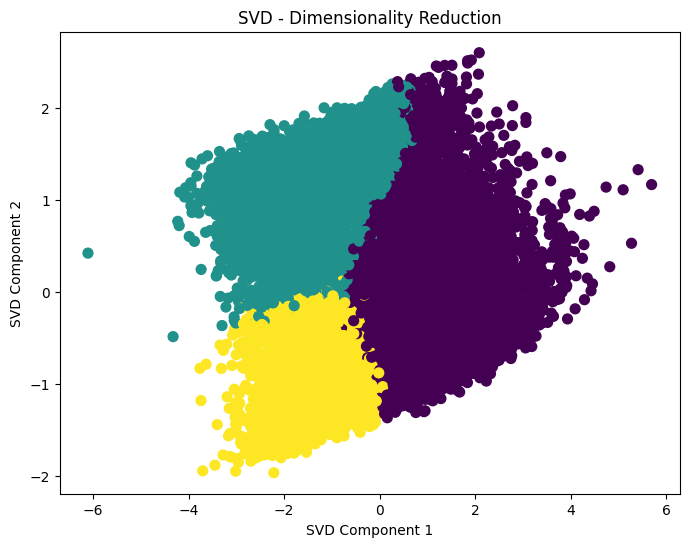

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
svd_components = svd.fit_transform(clustering_data_scaled)

# Plot SVD results
plt.figure(figsize=(8, 6))
plt.scatter(svd_components[:, 0], svd_components[:, 1], c=spectral_labels, cmap='viridis', s=50)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD - Dimensionality Reduction")
plt.show()

We can also perform:

**1. Non-linear Dimensionality Reduction (Multidimensional Scaling)**

*Multidimensional Scaling (MDS) preserves the pairwise distances in lower dimensions, often used when PCA or SVD doesn’t capture non-linear relationships.*

**2. Manifold Learning (t-SNE)**

*t-SNE is effective for visualizing high-dimensional data, especially for clustering structures.*

**However, these processes require a lot of memory so we will not be able to execute it here.**

## **Module 7 : Model Development and Evaluation**

Step 1: Linear Regression Model

*We’ll start by predicting one of the numerical columns in our dataset, like gripForce, based on features such as height_cm, weight_kg, and age.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = df[['height_cm', 'weight_kg', 'age']]
y = df['gripForce']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 44.75
R-squared (R2): 0.61


Step 2: Model Interpretation and Accuracy

*The Mean Squared Error (MSE) tells us how well the model fits the data; lower values indicate better performance. The R-squared (R2) value indicates how much variance in the target variable can be explained by the model.*

Step 3: Understanding Reinforcement Learning (RL)

*Reinforcement Learning is different from supervised learning because it involves an agent learning by interacting with an environment to maximize cumulative rewards over time. Unlike supervised learning, where the model learns from labeled data, RL focuses on learning through trial and error, without explicit guidance.*

### **Key Differences:**

**Data Dependency:** Supervised learning uses labeled data, whereas RL does not need labeled data and learns through interaction.

**Objective:** Supervised learning minimizes error, while RL maximizes cumulative rewards over a sequence of actions.

### **Applications of Reinforcement Learning:**

**Robotics:** Training robots to navigate environments.

**Game AI:** Teaching algorithms to play games like chess or Go.
Healthcare: Developing personalized treatment plans based on patient response.